In [20]:
library("ggplot2")
library("tidyverse")
library("plyr")
library("dplyr")
library("shiny")

custom_final28 = c(
                   "#44AAAA", "blueviolet", "#77AADD", "#117777", "gold1", "darkseagreen4",
                   "#77CCCC" ,"#771155", "#AA4488", "#EA6CC0", "#CC99BB","#88CCAA",
                   "#771122", "#AA4455", "plum4", "slateblue", "violetred","#5F7FC7",
                   "#D2781E", "#DDAA77","#CBD588", "#CC99BB", "#114477", "#4477AA",
                   "#1E78D2", "#77AADD", "#117777","#D21E2C","#DD7788","#777711")

# Function 1 : Calculate distribution of categorical data 

# Graph results

In [24]:
frequencycount = function (node, Property_Name){ 
    Table = data.frame(count(node, "Property_Name"))
    Table = arrange(Table, desc(freq))
    names(Table)[2] = "Counts"
    N = length(unique(Table$Property_Name))
    n = c("Number of Response Variables:", N)
    print(n, quote = FALSE)
    Table %>% 
    dplyr_fun_(.dots = list(arg1 = "val1", arg2 = "val2", ...))

    return(Table)
}

frequencycount_by_projectid = function (node, Property_Name){
     TableID = data.frame(count(node, c("project_id","Property_Name")))
     TableID = subset(TableID, Property_Name != "NA")
     TableID = arrange(TableID, desc(freq)) 
     names(TableID)[1] = "Project_ID"
     names(TableID)[3] = "Counts"
     N = length(unique(TableID$Project_ID))
     n = c("Number Unique Projects:", N)
     print(n, quote = FALSE)
     return(TableID)
}

In [22]:
graph_frequencycount = function (node, Property_Name){
    Property_Name = factor(Property_Name)
    TableID = data.frame(count(node, "Property_Name"))
    ymax = as.numeric(max(TableID$freq))
    graph = ggplot(node, aes(x = Property_Name)) +
    geom_bar(position = "dodge", stat="count") + 
    theme_bw() + 
    theme(legend.position = "bottom") +
    labs(y="Counts") +
    theme(legend.title = element_text(color = "black", size = 10),
          legend.text = element_text(color = "black", size = 5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_y_continuous(breaks=seq(0, (ymax + (.02*ymax)), (ymax/5))) +
    scale_fill_manual(values = custom_final28)
    return(graph)
}

graph_frequencycount_by_projectID = function (node, Property_Name){
    Property_Name = factor(Property_Name)
    TableID = data.frame(count(node, c("Property_Name", "project_id")))
    ymax = as.numeric(max(TableID$freq))
    graph = ggplot(node, aes(x = Property_Name, fill = project_id)) +
    geom_bar(position = "dodge", stat="count", width = .8) + 
    theme_bw() + 
    theme(legend.position = "bottom") +
    
    labs(y="Counts") +
    theme(legend.title = element_text(color = "black", size = 10),
          legend.text = element_text(color = "black", size = 5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_y_continuous(breaks=seq(0, (ymax + (.02*ymax)), (ymax / 5))) +
    scale_fill_manual(values = custom_final28)
    return(graph)
}

#Print all possible node options
AllFiles = list.files(path = ".", pattern = "master", recursive = TRUE)
AllNodes = AllFiles[!grepl("dockerHome", AllFiles)]
cat("List of nodes:", AllNodes, sep = "\n")

List of nodes:
aliquot_tsvs/master_aliquot.tsv
analyte_tsvs/master_analyte.tsv
biospecimen_tsvs/master_biospecimen.tsv
quantification_assay_tsvs/master_quantification_assay.tsv
sample_tsvs/master_sample.tsv


## Define 

### 1. node

### 2. Property_Name

In [4]:
node = read.csv("biospecimen_tsvs/master_biospecimen.tsv", sep = '\t')
node = subset(node, project_id != "internal-test" & project_id != "training-PCV" & project_id != "training-JFDI")
head(node)

X,type,id,project_id,submitter_id,biospecimen_anatomic_site,biospecimen_type,blood_tube_type,days_to_collection_not_reported,days_to_procurement_not_reported,⋯,primary_site,procurement_temperature,shipping_temperature,tumor_code,tumor_descriptor,tumor_morphology,cases.id,cases.submitter_id,followups.id,followups.submitter_id
0,biospecimen,d0c026e6-2b7e-4009-b1a2-3d8ddcda324f,bpa-Sysmex_P0001_T1,151_biospecimen_K2EDTA_2h_storage_RT,Blood,Fluid,EDTA,True,True,⋯,,20,20,,,,cc699363-27f7-4a63-8a98-74a557c93030,donor-31,,
1,biospecimen,e3550d6b-3138-4aef-bbbc-f2661c649a7c,bpa-Sysmex_P0001_T1,091_biospecimen_K2EDTA_2h_storage_RT,Blood,Fluid,EDTA,True,True,⋯,,20,20,,,,b69ea57e-6549-4cb1-a647-a89a30085a62,donor-19,,
2,biospecimen,e4bb556a-9eca-49a3-903e-b3b3980936bd,bpa-Sysmex_P0001_T1,092_biospecimen_Streck_2h_storage_RT,Blood,Fluid,Streck,True,True,⋯,,20,20,,,,b69ea57e-6549-4cb1-a647-a89a30085a62,donor-19,,
3,biospecimen,3a32092a-54ea-40af-b340-646b6d518517,bpa-Sysmex_P0001_T1,093_biospecimen_Streck_3d_storage_RT,Blood,Fluid,Streck,True,True,⋯,,20,20,,,,b69ea57e-6549-4cb1-a647-a89a30085a62,donor-19,,
4,biospecimen,7e00f982-fc9a-44ac-86bb-462934f62774,bpa-Sysmex_P0001_T1,152_biospecimen_Streck_2h_storage_RT,Blood,Fluid,Streck,True,True,⋯,,20,20,,,,cc699363-27f7-4a63-8a98-74a557c93030,donor-31,,
5,biospecimen,b56ee6d6-6949-40de-81c4-1b57012eed0e,bpa-Sysmex_P0001_T1,153_biospecimen_Streck_3d_storage_RT,Blood,Fluid,Streck,True,True,⋯,,20,20,,,,cc699363-27f7-4a63-8a98-74a557c93030,donor-31,,


In [5]:
Property_Name = node$blood_tube_type

In [25]:
frequencycount(node, Property_Name)

[1] Number of Response Variables: 6                            


ERROR: Error in dplyr_fun_(., .dots = list(arg1 = "val1", arg2 = "val2", ...)): could not find function "dplyr_fun_"


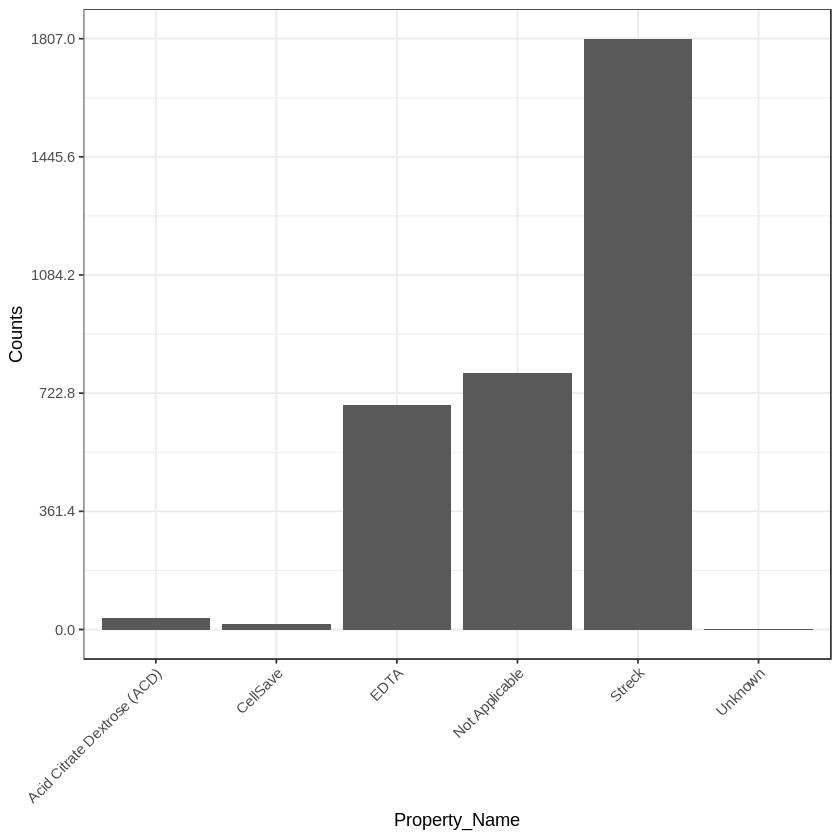

In [7]:
graph_frequencycount(node, Property_Name)

## By Project ID

In [8]:
head(frequencycount_by_projectid(node, Property_Name))

[1] Number Unique Projects: 27                     


Project_ID,Property_Name,Counts
bpa-Biodesix_P0001_T1,Not Applicable,730
bpa-Guardant_P0001_T1,Streck,500
bpa-MSKCC_P0002_T1,Streck,336
bpa-USC_OPT1_T1,Streck,317
bpa-Sysmex_P0001_T1,Streck,240
bpa-MSKCC_P0003_T1,Streck,221


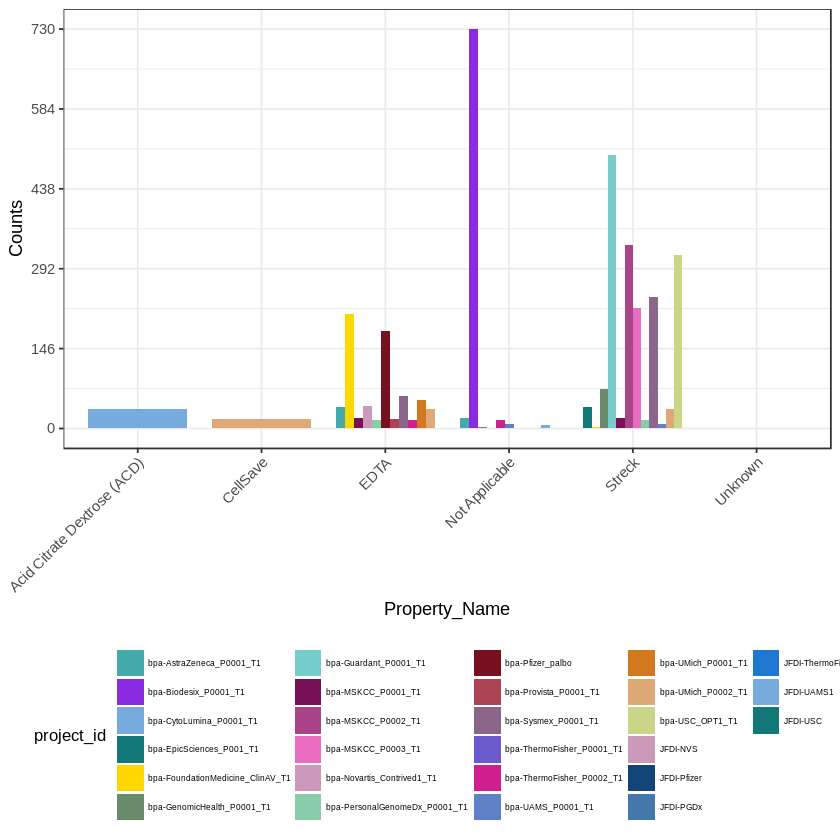

In [9]:
graph_frequencycount_by_projectID(node, Property_Name)

# Function 2: Calculate summary statistics on numerical data (e.g. mean, sd) 

# Graph results

In [10]:
summarizeNumericalData = function(data, numericalproperty, categoricalproperties, na.rm=TRUE,
                      .drop=TRUE) {
    newdata = ddply(data, categoricalproperties, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = sum(!is.na(xx[[col]]), na.rm=na.rm), 
          mean = round(mean(xx[[col]], na.rm=na.rm), 2),
          sd   = round(sd(xx[[col]], na.rm=na.rm), 2))
      },numericalproperty)
    N = length(unique(newdata$project_id))
    n = c("Number of Projects:", N)
    print(n, quote = FALSE)
    newdata$se = round(newdata$sd / sqrt(newdata$N),2)
    return(newdata)
}

summarizeNumericalData_assay = function(data, numericalproperty, categoricalproperties, na.rm=TRUE,
                      .drop=TRUE) {
    newdata = ddply(data, categoricalproperties, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = sum(!is.na(xx[[col]]), na.rm=na.rm), 
          mean = round(mean(xx[[col]], na.rm=na.rm), 2),
          sd   = round(sd(xx[[col]], na.rm=na.rm), 2))
      },numericalproperty)
    N = length(unique(newdata$assay_kit_name))
    n = c("Number of Projects:", N)
    print(n, quote = FALSE)
    newdata$se = round(newdata$sd / sqrt(newdata$N),2)
    return(newdata)
}

In [11]:
graph_summary_project_id =function(data, numericalproperty, categoricalproperties, na.rm=TRUE,
                      .drop=TRUE) {
    newdata = ddply(data, categoricalproperties, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = sum(!is.na(xx[[col]]), na.rm=na.rm),
          mean = round(mean(xx[[col]], na.rm=na.rm), 2),
          sd   = round(sd(xx[[col]], na.rm=na.rm), 2))
      },numericalproperty)
    
    newdata$se = round(newdata$sd / sqrt(newdata$N),2)
    graph = ggplot(newdata, aes(x=project_id, y=mean)) + 
    geom_bar(stat="identity", fill="skyblue", alpha=0.7) +
    geom_errorbar(aes(ymin=mean-se, ymax=mean+se), width=.1) +
    geom_line() +
    geom_point() +
    theme_linedraw() +
    scale_y_continuous(breaks=seq(0, 30, by =5)) +
    labs(y="Mean Molecular Concentration (ng/uL)", x = "Project ID") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_color_manual(values = custom_final28)
    theme(legend.position = "bottom") +
    theme(legend.title = element_text(color = "black", size = 10),
          legend.text = element_text(color = "black", size = 5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
    return(graph)
}

graph_summary_assay_kit =function(data, numericalproperty, categoricalproperties, na.rm=TRUE,
                      .drop=TRUE) {
    newdata = ddply(data, categoricalproperties, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = sum(!is.na(xx[[col]]), na.rm=na.rm),
          mean = round(mean(xx[[col]], na.rm=na.rm), 2),
          sd   = round(sd(xx[[col]], na.rm=na.rm), 2))
      },numericalproperty)
    
    newdata$se = round(newdata$sd / sqrt(newdata$N),2)
    graph = ggplot(newdata, aes(x=assay_kit_name, y=mean)) + 
    geom_bar(stat="identity", fill="skyblue", alpha=0.7) +
    geom_errorbar(aes(ymin=mean-se, ymax=mean+se), width=.1) +
    geom_line() +
    geom_point() +
    theme_linedraw() +
    scale_y_continuous(breaks=seq(0, 30, by =5)) +
    labs(y="Mean Molecular Concentration (ng/uL)", x = "Assay Kit") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_color_manual(values = custom_final28)
    theme(legend.position = "bottom") +
    theme(legend.title = element_text(color = "black", size = 10),
          legend.text = element_text(color = "black", size = 5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
    return(graph)
}

## Define 

### 1. Data
### 2. Numerical Property
### 3. Categorical Property

In [13]:
data = read.csv("MolecularConcentration.csv", sep = ",")
data = subset(data, project_id != "internal-test" & project_id != "training-PCV" & project_id != "training-JFDI")
head(data)

assay_kit_name,molecular_concentration,project_id,submitter_id
PicoGreen,16.708,bpa-GenomicHealth_P0001_T1,13_349_FC15851628-FD00514317.quantification_assay
PicoGreen,13.952,bpa-GenomicHealth_P0001_T1,10_229_FC15851646-FD00514335.quantification_assay
PicoGreen,24.737,bpa-GenomicHealth_P0001_T1,12_142_FC16225465-FD00513496.quantification_assay
PicoGreen,19.887,bpa-GenomicHealth_P0001_T1,10_231_FC15851662-FD00514367.quantification_assay
PicoGreen,14.746,bpa-GenomicHealth_P0001_T1,10_231_FC15851663-FD00514368.quantification_assay
PicoGreen,9.029,bpa-GenomicHealth_P0001_T1,10_231_FC15851665-FD00514370.quantification_assay


In [14]:
numericalproperty = "molecular_concentration"
categoricalproperties = c("project_id")

### Run Summary Statistics Function

In [15]:
head(summarizeNumericalData(data, numericalproperty, categoricalproperties))

[1] Number of Projects: 13                 


project_id,N,mean,sd,se
bpa-AstraZeneca_P0001_T1,59,23.72,15.92,2.07
bpa-GenomicHealth_P0001_T1,232,18.54,7.74,0.51
bpa-MSKCC_P0001_T1,0,NaN,NA,NA
bpa-Novartis_Contrived1_T1,195,0.70,0.06,0.00
bpa-PersonalGenomeDx_P0001_T1,30,0.12,0.27,0.05
bpa-Sysmex_P0001_T1,600,0.09,0.34,0.01


Warning message:
“Removed 1 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
Warning message:
“Removed 1 rows containing missing values (geom_point).”

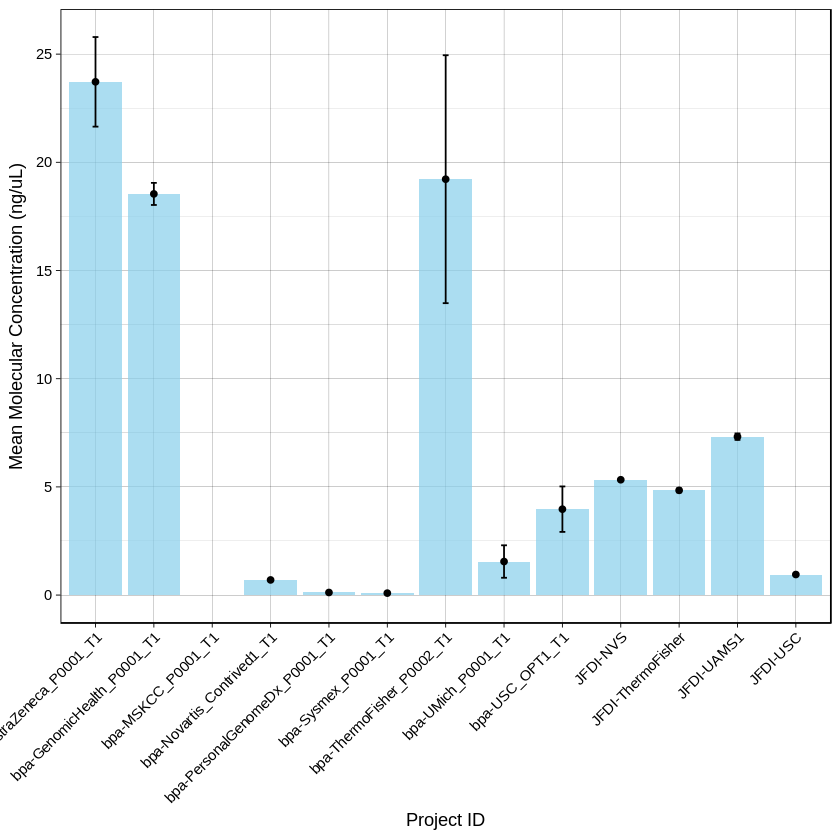

In [16]:
graph_summary_project_id(data, numericalproperty, categoricalproperties)

In [17]:
categoricalproperties = c("assay_kit_name")
summarizeNumericalData_assay(data, numericalproperty, categoricalproperties)

[1] Number of Projects: 8                  


assay_kit_name,N,mean,sd,se
,1084,1.02,6.31,0.19
1x dsDNA high sensitivity,6,7.32,0.37,0.15
D1000 ScreenTape,59,23.72,15.92,2.07
DSP Virus/Pathogen Midi Kit,0,NaN,NA,NA
high sensitivity NGS,0,NaN,NA,NA
Ion Library TaqMan Quantitation Kit,7,4.84,0.24,0.09
PicoGreen,232,18.54,7.74,0.51
Qubit dsDNA High Sensitivity,16,19.22,22.93,5.73


Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
Warning message:
“Removed 2 rows containing missing values (geom_point).”

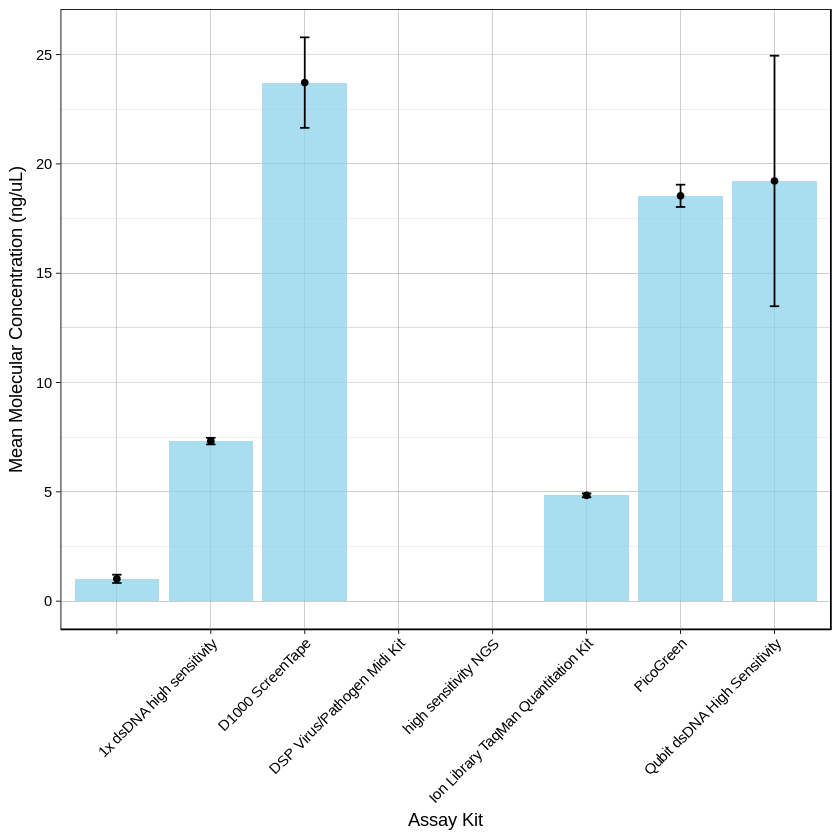

In [18]:
graph_summary_assay_kit(data, numericalproperty, categoricalproperties)

# FIN.